Step1:Import Required Libraries

In [82]:
 %matplotlib inline
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from wordcloud import WordCloud

In [6]:
# Load the dataset
data = pd.read_csv('netflix1.csv')
 # Display the first few rows of the dataset
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

 Step 3: Data Cleaning
 

 Identify and handle missing data, correct data types, and drop duplicates.

In [87]:
 # Check for missing values
 print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
year            0
month           0
day             0
dtype: int64


In [14]:
 # Drop duplicates if any
 data.drop_duplicates(inplace=True)

In [18]:
 # Drop rows with missing critical information
 data.dropna(subset=['director','type','country'],inplace=True)

In [21]:
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])


In [23]:
# Show data types to confirm changes
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


 Step 4: Exploratory Data Analysis (EDA)

1. Content Type Distribution (Movies vs. TV Shows)

In [89]:
 # Count the number of Movies and TV Shows
type_counts = data['type'].value_counts()

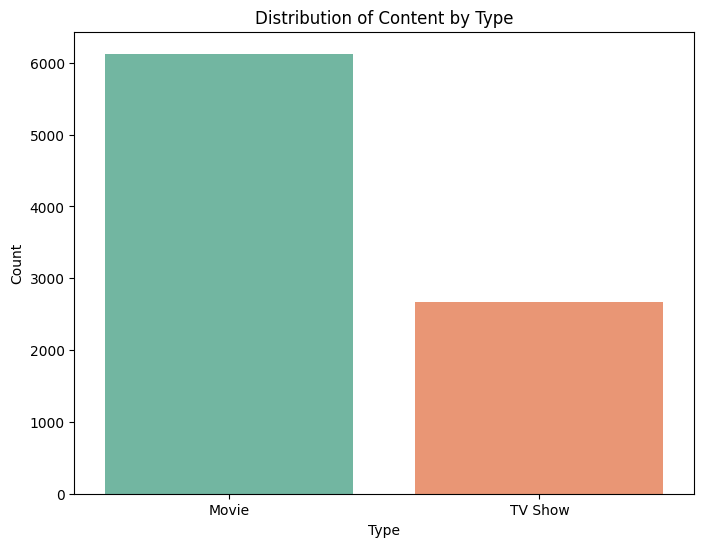

In [90]:
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values,hue=type_counts.index,palette='Set2',legend=False)
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

2. Most Common Genres

In [33]:
# Split the 'listed_in' column and count genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)


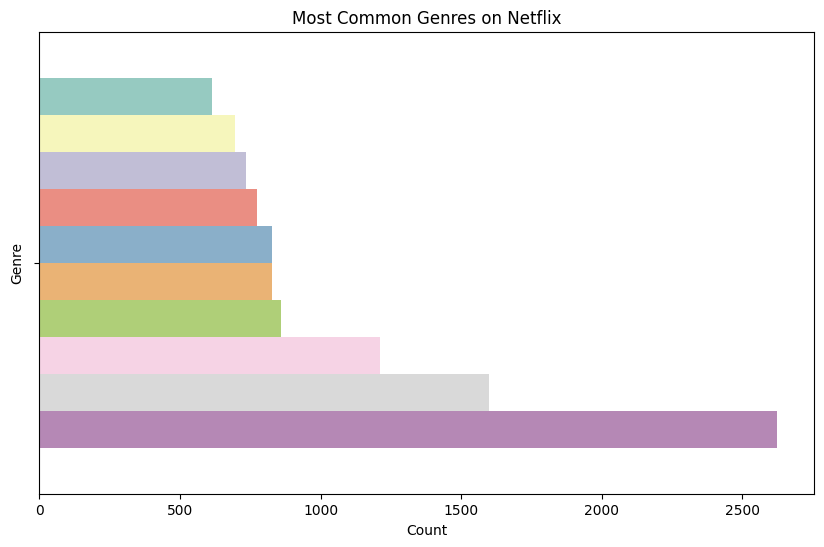

In [35]:
# Plot the most common genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values,hue=genre_counts.values,palette='Set3',legend=False)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
 

 3. Content Added Over Time

In [36]:
 # Extract year and month from 'date_added'
y=genre_counts.index,
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

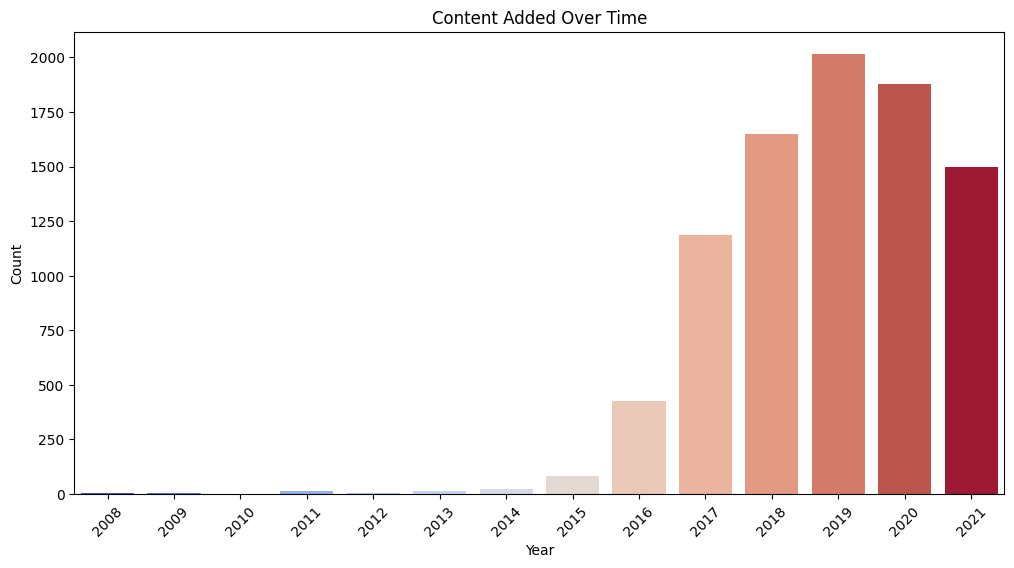

In [38]:
 # Plot content added over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, hue='year_added',palette='coolwarm',legend=False)
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

4. Top 10 Directors with the Most Titles

In [40]:
# Count titles by director
top_directors = data['director'].value_counts().head(10)

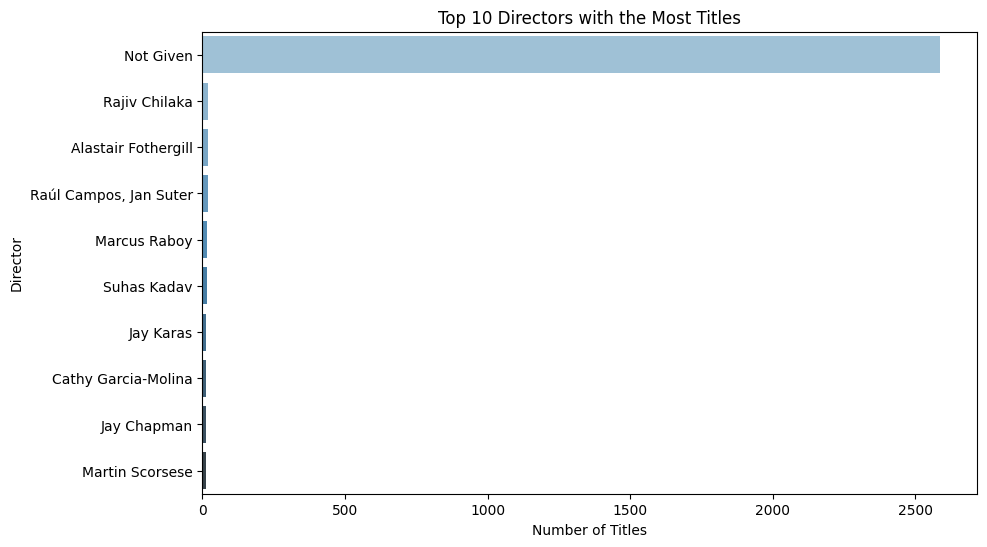

In [42]:
# Plot top directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values,y=top_directors.index,hue=top_directors.index, palette='Blues_d',legend=False)
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

5. Word Cloud of Movie Titles

In [91]:
# Generate word cloud
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

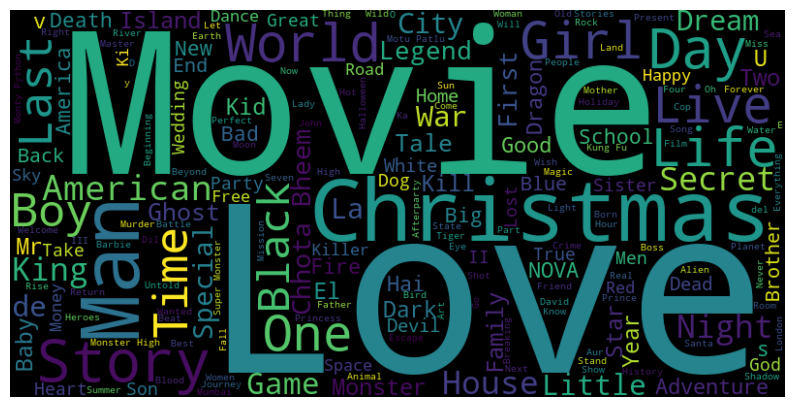

In [44]:
 # Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Step 5: Conclusion and Insights

 In this project, we:
 1. Cleaned the data by handling missing values, removing duplicates, and
 converting data types.
 2. Explored the data through various visualizations such as bar plots and word
 clouds.
 3. Analyzed content trends over time, identified popular genres, and highlighted
 top directors.

Step 6: Next Steps
 1. Feature Engineering: Create new features, such as counting the number of
 genres per movie or extracting the duration in minutes.
 2. Machine Learning: Use the cleaned and processed data to build models for
 recommendations or trend predictions.
 3. Advanced Visualization: Use interactive plots or dashboards for more detailed
 analysis.

 This project is a foundational exercise that introduces essential data analysis
 techniques, paving the way for more advanced projects.


Sample code


In [47]:
 import pandas as pd
 import numpy as np
 import pandas as pd
 import numpy as np

 Importing data from csv and getting info about data.

In [49]:
data=pd.read_csv("netflix1.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [51]:
 data.shape

(8790, 10)

In [52]:
 data=data.drop_duplicates()

Content distribution on Netflix.

In [53]:
 data['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

Text(0.5, 0.98, 'TotalContentonNetflix')

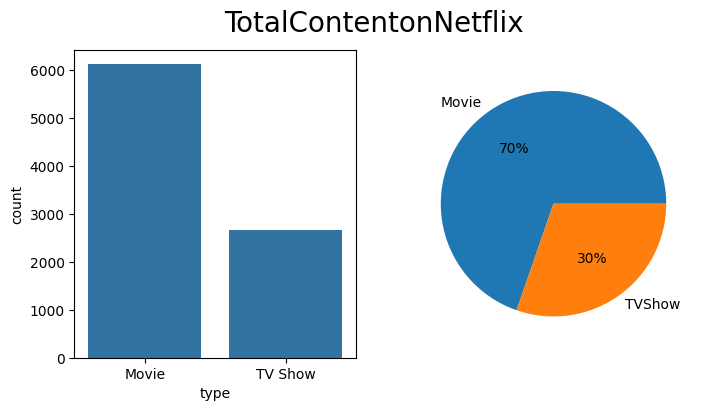

In [54]:
freq=data['type'].value_counts()
fig,axes=plt.subplots(1,2,figsize=(8,4))
sns.countplot(data,x=data['type'],ax=axes[0])
plt.pie(freq,labels=['Movie','TVShow'],autopct='%.0f%%')
plt.suptitle('TotalContentonNetflix',fontsize=20)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


 Visual representation of rating frequency of movies and TV Shows on Netflix.

In [56]:
 data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Text(0.5, 0.98, 'Rating on Netflix')

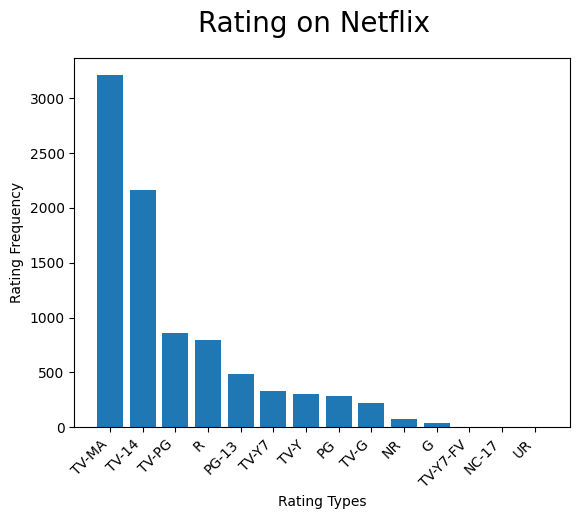

In [58]:
ratings=data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)


Text(0.5, 0.98, 'Rating on Netflix')

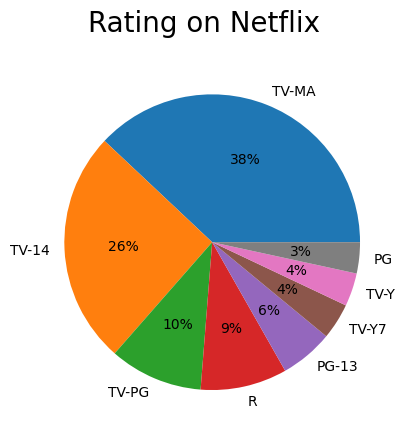

In [59]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)

 Converting date_added column to datetime.

In [61]:
# lets convert column date_added to datetime.
data['date_added']=pd.to_datetime(data['date_added'])

In [62]:
data.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [63]:
data['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Luxembourg           1
Senegal              1
Belarus              1
Puerto Rico          1
Cyprus               1
Name: count, Length: 86, dtype: int64

 Top 10 countries with most content on Netflix

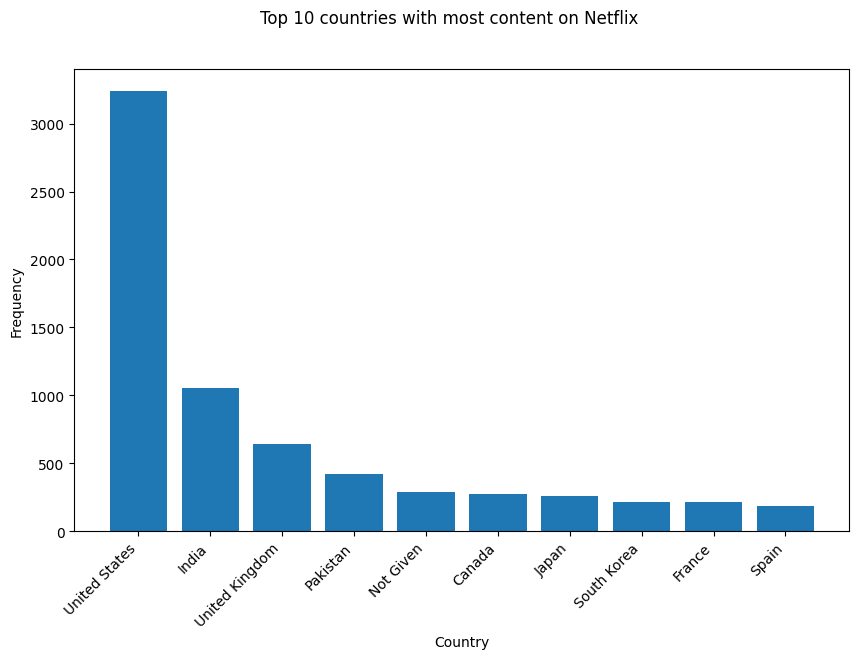

In [64]:
top_ten_countries=data['country'].value_counts().reset_index(). sort_values(by='count',ascending=False)[:10]
plt.figure(figsize=(10,6))
plt.bar(top_ten_countries['country'],top_ten_countries['count'])
plt.xticks(rotation=45,ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()


In [65]:
 data['year']=data['date_added'].dt.year
 data['month']=data['date_added'].dt.month
 data['day']=data['date_added'].dt.day

Monthly releases of Movies and TV shows on Netflix


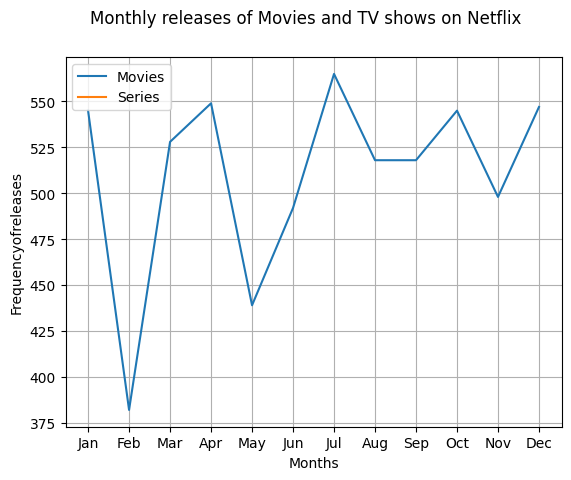

In [67]:
monthly_movie_release=data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=data[data['type']=='TVShow']['month'].value_counts().sort_index()

plt.plot(monthly_movie_release.index,monthly_movie_release.values,label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values,label='Series')
plt.xlabel("Months")
plt.ylabel("Frequencyofreleases")
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()


Yearly releases of Movies and TV Shows on Netflix


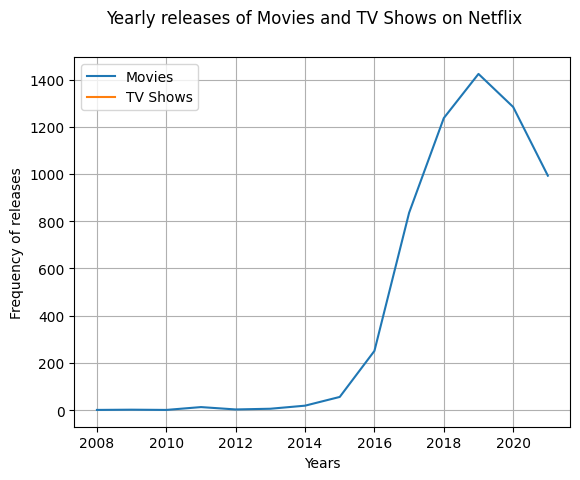

In [68]:
yearly_movie_releases=data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=data[data['type']=='TVShow']['year'].value_counts().sort_index()

plt.plot(yearly_movie_releases.index,yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

Top 10 popular movie genres


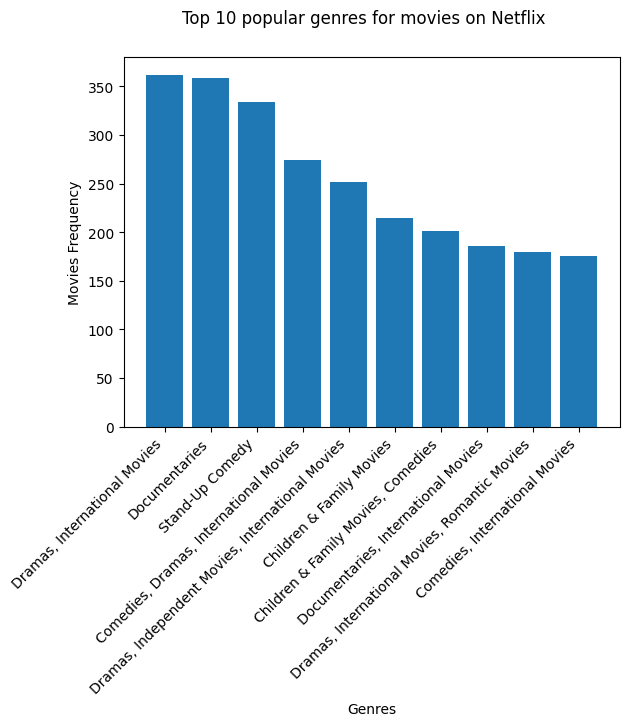

In [76]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['type']=='TVShow'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

Top 10 TV Shows genres

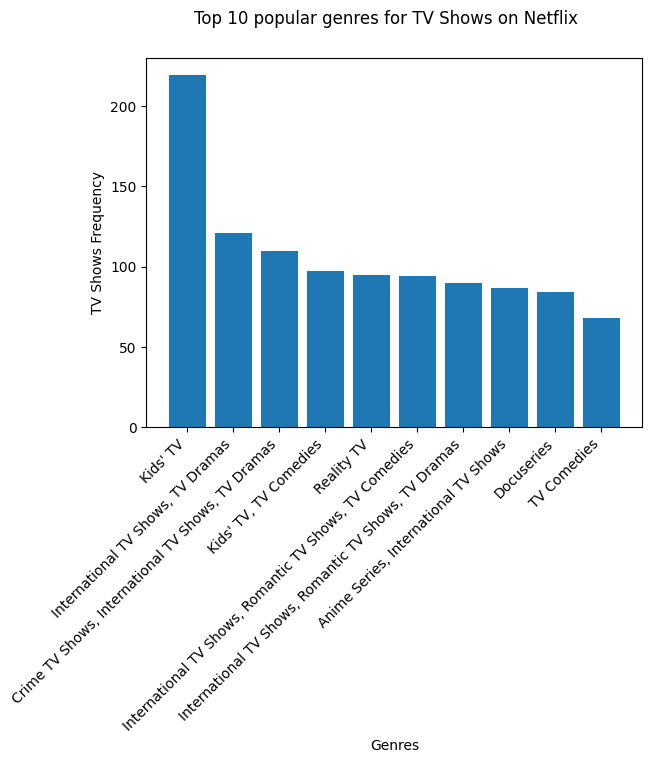

In [85]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.bar(popular_series_genre.index, popular_series_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()


Top 15 directors across Netflix with hoigh frequency of movies and shows.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Marcus Raboy'),
  Text(4, 0, 'Suhas Kadav'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Jay Chapman'),
  Text(8, 0, 'Martin Scorsese'),
  Text(9, 0, 'Youssef Chahine'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

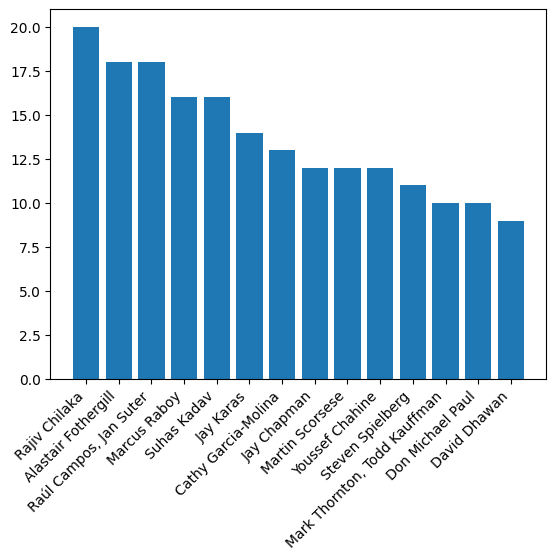

In [86]:
directors=data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]

plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')